In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('data/find_best_cn127.csv')

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']

df

,pin,size,threads,runtime,runtimestd,usertime,usertimestd,energy,energystd,MFLOP/J,GFLOP/s
0,True,500,4,0.109611,0.001586,0.435057,0.005679,2.747182,0.069496,90.911353,2.278520
1,True,500,5,0.105443,0.001426,0.519185,0.000497,2.649972,0.021351,94.246262,2.368576
2,True,500,6,0.100367,0.000356,0.594504,0.001724,2.591296,0.035538,96.380351,2.488374
3,True,500,7,0.096583,0.000524,0.666934,0.001290,2.777426,0.198139,89.921397,2.585872
4,True,500,8,0.092442,0.000569,0.729722,0.001412,2.457171,0.022454,101.641258,2.701685
...,...,...,...,...,...,...,...,...,...,...,...
60,True,1500,12,1.940353,0.052266,21.982720,0.259309,73.641099,1.296977,91.630218,3.477589
61,True,1500,13,1.935676,0.031146,24.326769,0.202604,74.778364,0.671739,90.236662,3.485991
62,True,1500,14,1.981998,0.022830,27.194562,0.271373,76.909603,0.799822,87.736118,3.404518
63,True,1500,15,2.102979,0.020318,31.068808,0.207953,80.843315,1.010078,83.467013,3.208662


In [94]:
by_size = df.groupby('size')

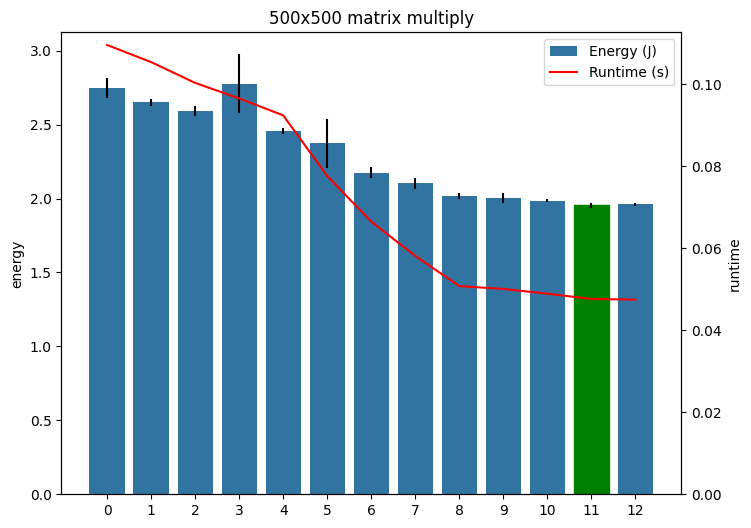

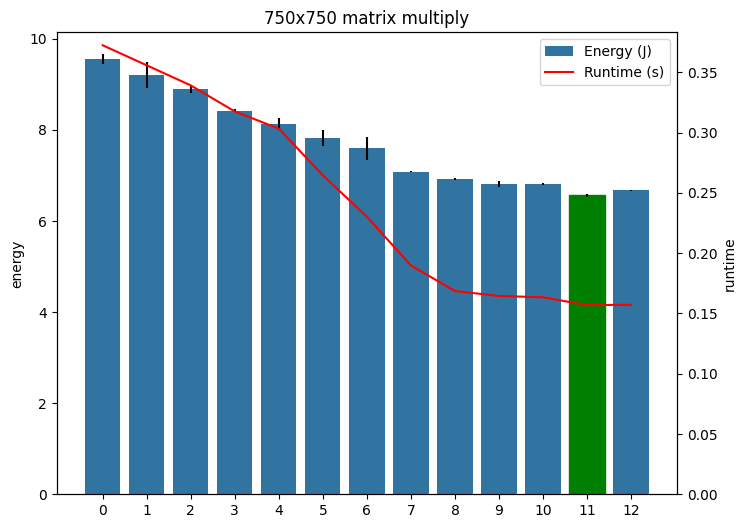

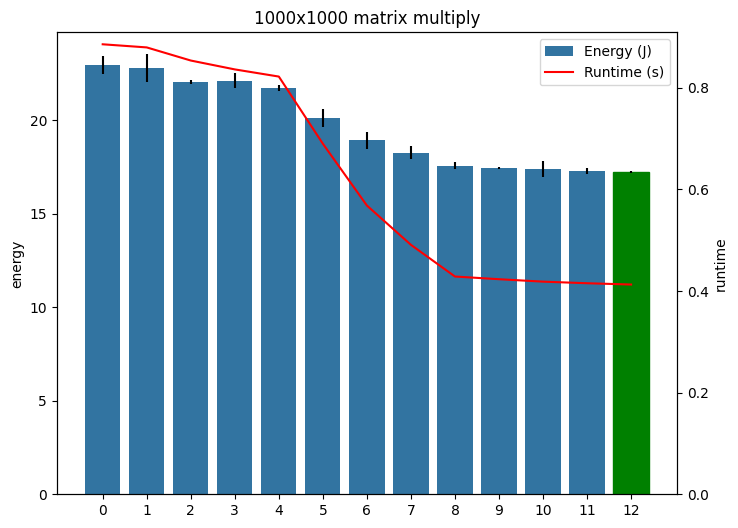

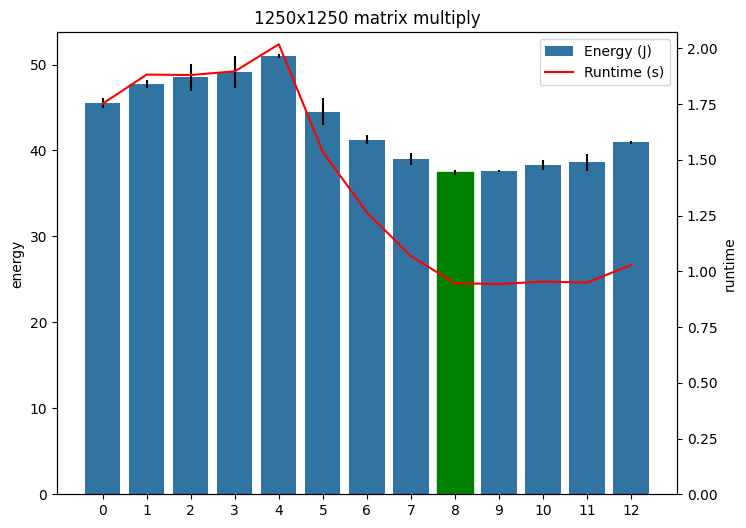

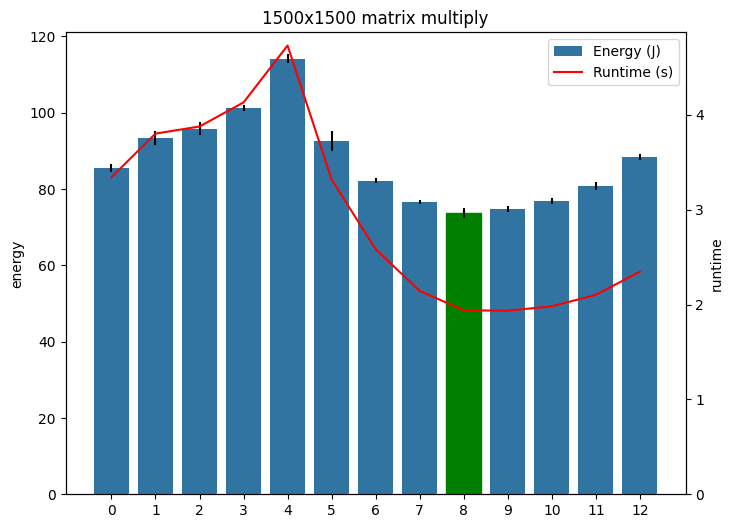

In [95]:
for size, dfx in by_size:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energystd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()

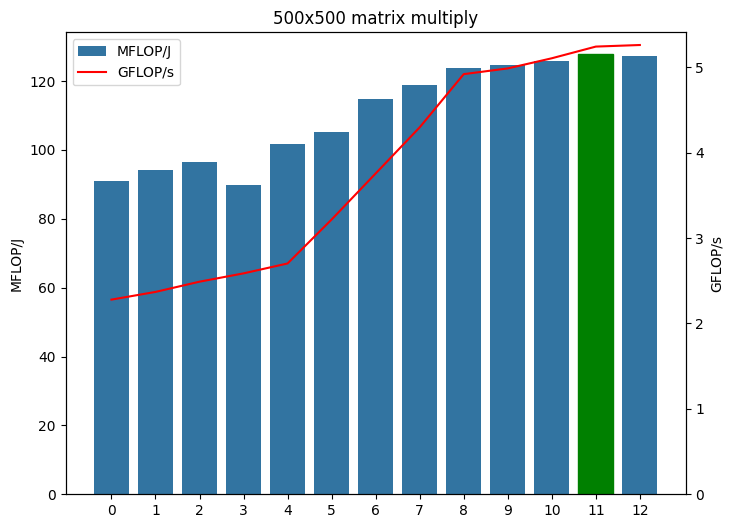

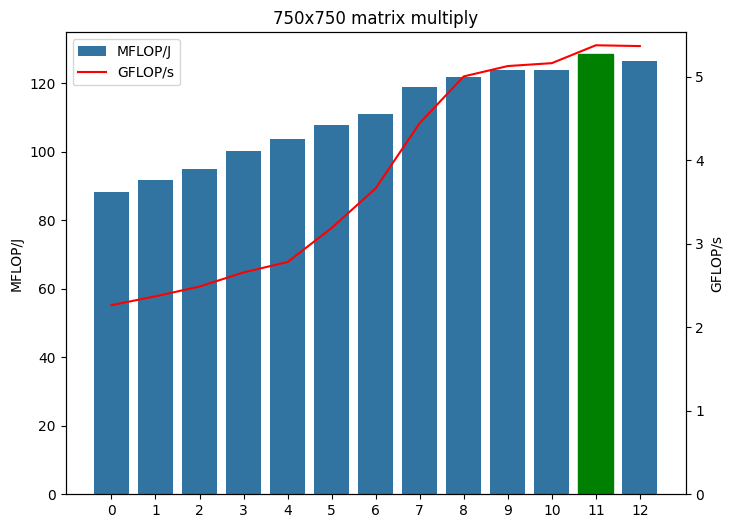

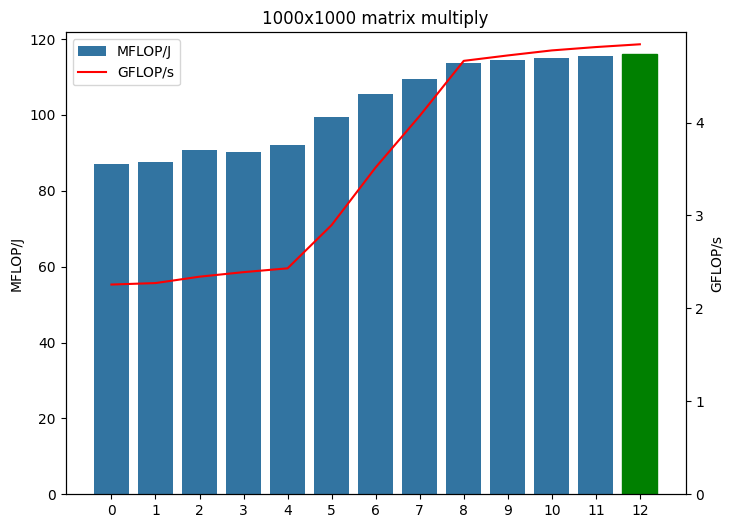

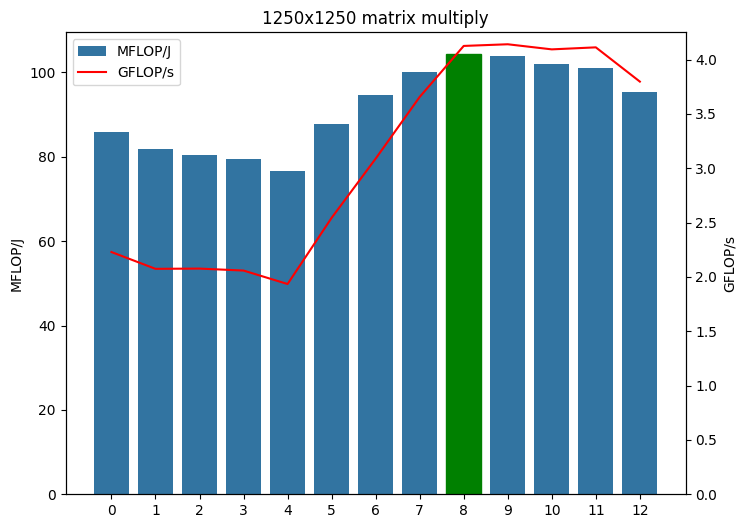

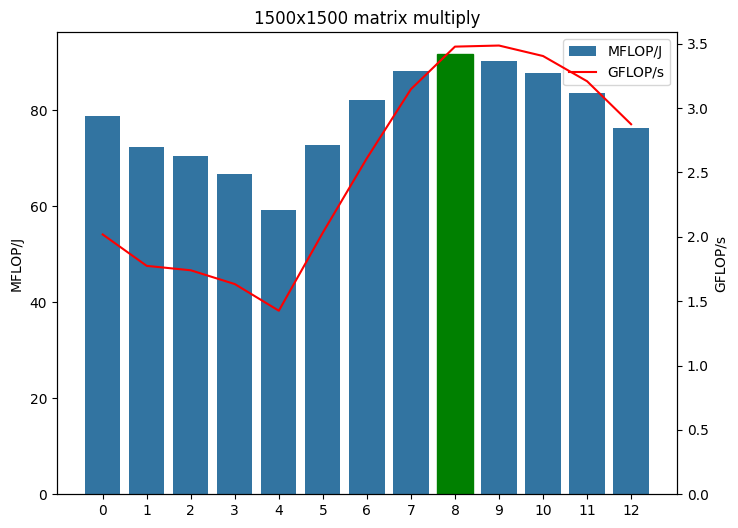

In [96]:
for size, dfx in by_size:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['MFLOP/J'], label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['GFLOP/s'], label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == dfx['MFLOP/J'].max():
            bar.set_color('g')
            break

plt.show()